In [1]:
import pandas as pd

DATABASE_PATH = '2020-11-04/unwrapped_dataset1'

# Make a new DataFrame
df = pd.read_csv(DATABASE_PATH + '/database_entries.csv')

# Strip trailing whitespace from column names
df = df.rename(columns=lambda x: x.strip())

# Show the first few entries...
df.head()

,Timestamp [ms],X [mm],Y [mm],Z [mm],Heading [degrees],Pitch [degrees],Roll [degrees],Filename,GPS quality,UTM zone
0,2.129512,7.044975e+08,5.638661e+09,56600.0,359.9375,-1.625,7.0,image0.jpg,4,30U
1,202.246529,7.044975e+08,5.638661e+09,56600.0,359.9375,-1.625,7.0,image1.jpg,4,30U
2,402.833237,7.044975e+08,5.638661e+09,56600.0,359.9375,-1.625,7.0,image2.jpg,4,30U
3,602.693835,7.044975e+08,5.638661e+09,56600.0,359.9375,-1.625,7.0,image3.jpg,4,30U
4,802.647239,7.044975e+08,5.638661e+09,56600.0,359.9375,-1.625,7.0,image4.jpg,4,30U


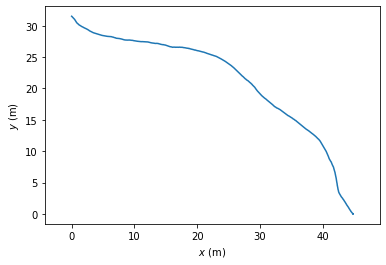

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# The coordinates are in millimetres (don't ask why); convert to metres
x = df['X [mm]'] / 1000
y = df['Y [mm]'] / 1000

# As these coordinates are UTM, the x and y values are huge. Renormalise so the axes start from (0, 0)
x -= np.min(x)
y -= np.min(y)

# Plot the coordinates
plt.plot(x, y)
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.axis('equal');

Loading 2020-11-04/unwrapped_dataset1/image0.jpg


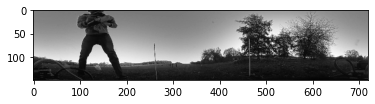

In [3]:
import cv2

impath = DATABASE_PATH + '/' + df['Filename'][0]
print('Loading ' + impath)

# Read in image file
im = cv2.imread(impath, cv2.IMREAD_GRAYSCALE)

# Check it actually loaded successfully
assert im is not None

# Display image
plt.imshow(im, cmap='gray');

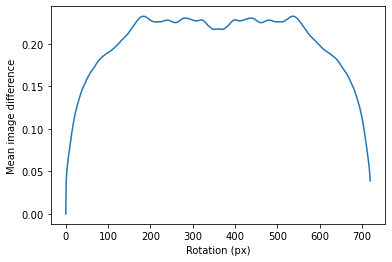

In [4]:
def meanAbsDiff(im1, im2):
    # We're assuming that these images are bytes (i.e. max value is 255)
    assert im.dtype == 'uint8'

    diffIm = cv2.absdiff(im1, im2)
    return np.mean(diffIm) / 255.0

def calculateRIDF(im1, im2):
    diffs = []
    for i in range(im.shape[1]):
        # Rotate image to the right by i pixels
        rotIm = np.roll(im, i, axis=1)

        # Save the difference between initial image and rotated version
        diffs.append(meanAbsDiff(im, rotIm))
    
    # Return as a numpy array because they're easier to work with
    return np.array(diffs)

# Compute an auto-RIDF, i.e. comparing im vs itself
ridf = calculateRIDF(im, im)

plt.xlabel('Rotation (px)')
plt.ylabel('Mean image difference')
plt.plot(ridf);